In [2]:
import pandas as pd
import numpy as np
import seaborn as sns            # data visualization
import matplotlib.pyplot as plt  # visualization in python
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [3]:
ds = pd.read_csv("StudentsPerformance.csv") #read file

In [4]:
ds.shape #show rows and columns

(1000, 8)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
ds.isnull().sum() #show null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
ds.head() # show top 5 values

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
ds = ds.rename(columns = {  #rename columns
    "race/ethnicity":"race",
    "parental level of education": "parent_education",
    "test preparation course":"test_course",
    "math score":"math_score",
    "reading score":"reading_score",
    "writing score":"writing_score"
})

In [12]:
ds.head()

,gender,race,parent_education,lunch,test_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
ds.loc[len(ds)]=[ 
    "female",
    "group A",
    "pHD",
    "standard",
    "completed",
    99,
    98,
    94
] #insert new record in existing record

In [10]:
ds["total_score"] = ds["math_score"]+ds["reading_score"]+ds["writing_score"] #create new column

In [11]:
ds.head()

,gender,race,parent_education,lunch,test_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [12]:
ds.loc[len(ds)]=[ # add blank values
    "male",
    "group A",
    np.nan,
    "standard",
    "completed",
    np.nan,
    98,
    94,
    192
]

In [13]:
print(len(ds.columns))

9


In [14]:
ds.loc[len(ds)]=[
    "male",
    "group B",
    np.nan,
    "free",
    "none",
    np.nan,
    50,
    50,
    100
]

In [15]:
ds.loc[len(ds)] = [
    "female",
    "group C",
    np.nan,
    "standard",
    "completed",
    -200,    # extreme low value
    60,
    65,
    np.nan,
]


In [13]:
ds.isnull().sum()

gender              0
race                0
parent_education    3
lunch               0
test_course         0
math_score          2
reading_score       0
writing_score       0
total_score         1
dtype: int64

<AxesSubplot:ylabel='writing_score'>

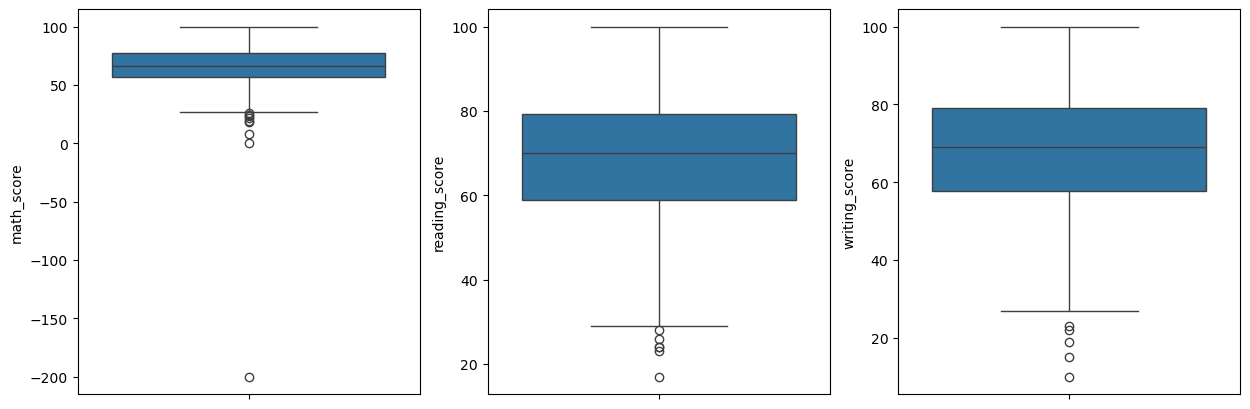

In [16]:
#boxplot
#fig:entire figure, axes:array of individual plot area, 1:rows, 2:columns, figsize=(15,5) Width = 15 inches, Height = 5 inches
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=ds["math_score"],ax=axes[0]) #without axes[0],axes[1] it will overlap
sns.boxplot(data=ds["reading_score"],ax=axes[1])
sns.boxplot(data=ds["writing_score"],ax=axes[2])

#circle/Dots in graph represents outlier: values far away from majority of values
#Box: middle 50%data
#Line inside box: median
#Whiskers: normal range


In [17]:
ds.dtypes

gender               object
race                 object
parent_education     object
lunch                object
test_course          object
math_score          float64
reading_score         int64
writing_score         int64
total_score         float64
dtype: object

In [18]:
# Z-score tells how many standard deviations a data point is away from the mean.
#|Z|>3 outlier
#|Z|<=3 normal data

#compute zscore
ds["math_zscore"] = zscore(ds["math_score"],nan_policy="omit") #nan_policy="omit" : ignore NaN value


In [19]:
#detect outlier
math_outliers = ds[ds["math_zscore"].abs()>3]

In [20]:
ds["math_outlier"]="Normal"
ds.loc[ds["math_zscore"].abs()>3,"math_outlier"] = "Outlier"

In [21]:
ds.head()

,gender,race,parent_education,lunch,test_course,math_score,reading_score,writing_score,total_score,math_zscore,math_outlier
0,female,group B,bachelor's degree,standard,none,72.0,72,74,218.0,0.354165,Normal
1,female,group C,some college,standard,completed,69.0,90,88,247.0,0.181225,Normal
2,female,group B,master's degree,standard,none,90.0,95,93,278.0,1.391807,Normal
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,148.0,-1.087004,Normal
4,male,group C,some college,standard,none,76.0,78,75,229.0,0.584752,Normal


In [22]:
ds[ds["math_outlier"] == "Outlier"]


,gender,race,parent_education,lunch,test_course,math_score,reading_score,writing_score,total_score,math_zscore,math_outlier
59,female,group C,some high school,free/reduced,none,0.0,17,10,27.0,-3.796401,Outlier
980,female,group B,high school,free/reduced,none,8.0,24,23,55.0,-3.335227,Outlier
1003,female,group C,NaN,standard,completed,-200.0,60,65,NaN,-15.325752,Outlier


In [23]:
#data transformation 
scaler = MinMaxScaler() #create instance by default values 0 to 1
ds["total_score_log"] = scaler.fit_transform(ds[["total_score"]])

In [88]:
ds.head()

,gender,race,parent_education,lunch,test_course,math_score,reading_score,writing_score,total_score,math_zscore,math_outlier,total_score_log
0,female,group B,bachelor's degree,standard,none,72.0,72,74,218.0,0.354165,Normal,0.699634
1,female,group C,some college,standard,completed,69.0,90,88,247.0,0.181225,Normal,0.805861
2,female,group B,master's degree,standard,none,90.0,95,93,278.0,1.391807,Normal,0.919414
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,148.0,-1.087004,Normal,0.443223
4,male,group C,some college,standard,none,76.0,78,75,229.0,0.584752,Normal,0.739927


In [24]:
ds[["total_score","total_score_log"]]

,total_score,total_score_log
0,218.0,0.699634
1,247.0,0.805861
2,278.0,0.919414
3,148.0,0.443223
4,229.0,0.739927
...,...,...
999,249.0,0.813187
1000,291.0,0.967033
1001,192.0,0.604396
1002,100.0,0.267399


In [25]:
ds["parent_education"] =  ds["parent_education"].fillna(ds["parent_education"].mode()) #remove null values

In [26]:
ds["test_course"] = ds["test_course"].fillna(ds["test_course"].mode()[0]) #remove null values


In [27]:
ds.isnull().sum()

gender              0
race                0
parent_education    3
lunch               0
test_course         0
math_score          2
reading_score       0
writing_score       0
total_score         1
math_zscore         2
math_outlier        0
total_score_log     1
dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ds["total_score_log"] = scaler.fit_transform(ds[["total_score"]])
ds[["total_score","total_score_log"]]

,total_score,total_score_log
0,218.0,0.342988
1,247.0,1.018947
2,278.0,1.741524
3,148.0,-1.288638
4,229.0,0.599386
...,...,...
999,249.0,1.065565
1000,291.0,2.044541
1001,192.0,-0.263045
1002,100.0,-2.407467
